# Base de données Airbnb

Dans notre travail, on va analyser le service de plateforme communautaire payant de location de logements de particuliers **Airbnb**. Plus précisément, notre travail consiste à trouver la meilleure façon de débuter un business sur Airbnb à Montréal. 

Notre base de données se trouve sur le site **insideairbnb.com**

http://insideairbnb.com/get-the-data.html

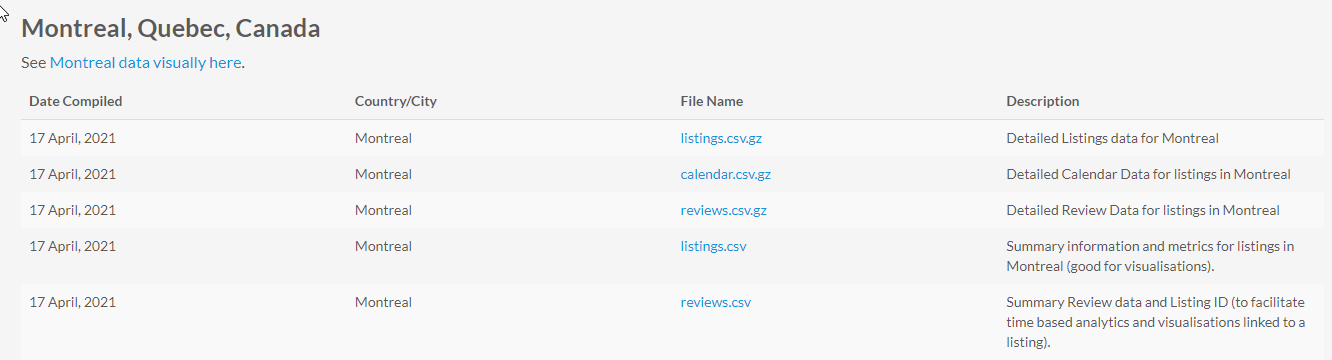

#  Importation des Librairies

In [1]:
# On importe les modules qu'on va utiliser dans notre projet
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
#!pip install pivottablejs
from pivottablejs import pivot_ui
import seaborn as sns
#!pip install folium
import folium
!pip install pyextremes
import pyextremes
from pyextremes import EVA
from folium import plugins
from math import *
%matplotlib inline

# Importation de données

In [2]:
# On importe le fichier .xlsx 
airbnb_montreal=pd.read_excel("AirBNB.xlsx")

In [3]:
# affichage de verification:
airbnb_montreal.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,price,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2078,https://www.airbnb.com/rooms/2078,20210417162917,2021-04-22,Central comfy close to Metro Laurie,Centrally located in trendy Le Plateau. Join...,Although my place is centrally located in Le P...,https://a0.muscache.com/pictures/88170231/0e5b...,2277,https://www.airbnb.com/users/show/2277,...,10.0,10.0,NaN,t,38.0,1,0,1,0,2.09
1,29059,https://www.airbnb.com/rooms/29059,20210417162917,2021-04-22,Lovely studio Quartier Latin,"Lovely studio with 1 closed room, near everyth...",NaN,https://a0.muscache.com/pictures/736399/fa6c31...,125031,https://www.airbnb.com/users/show/125031,...,10.0,10.0,NaN,f,96.0,2,2,0,0,2.50
2,29061,https://www.airbnb.com/rooms/29061,20210417162917,2021-04-19,Maison historique - Quartier Latin,Charmante maison au coeur du Quartier Latin et...,NaN,https://a0.muscache.com/pictures/9e59d417-4b6a...,125031,https://www.airbnb.com/users/show/125031,...,10.0,9.0,NaN,t,190.0,2,2,0,0,0.62
3,31847,https://www.airbnb.com/rooms/31847,20210417162917,2021-04-20,Downtown/Airport room,Come stay in this trendy area of downtown Mont...,The Atwater Market area of downtown is a real ...,https://a0.muscache.com/pictures/e6a520fd-f424...,2319,https://www.airbnb.com/users/show/2319,...,10.0,10.0,NaN,t,40.0,2,0,2,0,1.17
4,34715,https://www.airbnb.com/rooms/34715,20210417162917,2021-04-19,Chez Patrac ! Métro Beaubien,Welcome to Montreal<br /><br />Looking for an ...,NaN,https://a0.muscache.com/pictures/1209820/5968a...,149769,https://www.airbnb.com/users/show/149769,...,8.0,9.0,NaN,f,135.0,1,1,0,0,0.03


In [4]:
#2/ voir la taille de la data
airbnb_montreal.shape

(13877, 74)

In [5]:
# 3/ verifier les type de chaque variable avant de commencer les calcules
airbnb_montreal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13877 entries, 0 to 13876
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            13877 non-null  int64         
 1   listing_url                                   13877 non-null  object        
 2   scrape_id                                     13877 non-null  int64         
 3   last_scraped                                  13877 non-null  datetime64[ns]
 4   name                                          13869 non-null  object        
 5   description                                   13168 non-null  object        
 6   neighborhood_overview                         7699 non-null   object        
 7   picture_url                                   13877 non-null  object        
 8   host_id                                       13877 non-null  int6

In [6]:
# 4) verifier les variable statestiques(numerique)
airbnb_montreal.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_communication,review_scores_location,review_scores_value,license,price,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.387700e+04,1.387700e+04,1.387700e+04,13530.000000,13530.000000,0.0,13877.000000,13877.000000,13877.000000,0.0,...,10136.000000,10128.000000,10128.000000,0.0,13877.000000,13877.000000,13877.000000,13877.000000,13877.000000,10452.000000
mean,2.862174e+07,2.021042e+13,1.101987e+08,11.226977,11.226977,NaN,45.515278,-73.588594,3.347193,NaN,...,9.666535,9.642378,9.361572,NaN,98.070701,8.946386,7.785400,1.065432,0.034950,0.828989
std,1.363467e+07,3.425905e+00,1.103123e+08,35.433981,35.433981,NaN,0.031340,0.041939,2.196285,NaN,...,0.985684,0.838298,1.120380,NaN,92.019943,21.416591,21.274407,3.685990,0.530563,1.200212
min,2.078000e+03,2.021042e+13,2.277000e+03,0.000000,0.000000,NaN,45.404680,-73.949860,0.000000,NaN,...,2.000000,2.000000,2.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.861285e+07,2.021042e+13,1.823495e+07,1.000000,1.000000,NaN,45.496670,-73.601720,2.000000,NaN,...,10.000000,9.000000,9.000000,NaN,47.000000,1.000000,1.000000,0.000000,0.000000,0.120000
50%,2.886446e+07,2.021042e+13,6.886726e+07,1.000000,1.000000,NaN,45.517470,-73.579030,2.000000,NaN,...,10.000000,10.000000,10.000000,NaN,75.000000,1.000000,1.000000,0.000000,0.000000,0.330000
75%,4.086106e+07,2.021042e+13,1.853610e+08,5.000000,5.000000,NaN,45.532850,-73.565790,4.000000,NaN,...,10.000000,10.000000,10.000000,NaN,113.000000,5.000000,3.000000,1.000000,0.000000,1.030000
max,4.924999e+07,2.021042e+13,3.967877e+08,392.000000,392.000000,NaN,45.699950,-73.481630,16.000000,NaN,...,10.000000,10.000000,10.000000,NaN,999.000000,152.000000,152.000000,47.000000,14.000000,13.430000


In [7]:
# notre objectif est de modeliser les prix
# avant tous on vas verifie la variable de prix:
airbnb_montreal['price'].head()

0     38.0
1     96.0
2    190.0
3     40.0
4    135.0
Name: price, dtype: float64

In [8]:
# voir la description:
airbnb_montreal['price'].describe()

count    13877.000000
mean        98.070701
std         92.019943
min          0.000000
25%         47.000000
50%         75.000000
75%        113.000000
max        999.000000
Name: price, dtype: float64

<AxesSubplot:ylabel='price'>

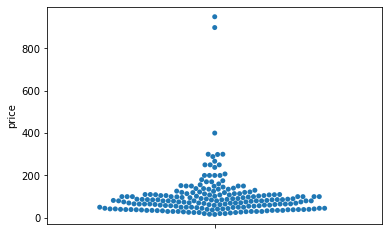

In [9]:
# on met la colonne prix dans une variable temporaire
prices_temp=airbnb_montreal['price']
sns.swarmplot(y=prices_temp.sample(200))

In [10]:
# on constate que le prix le plus cher est de 999$

In [11]:
airbnb_montreal.iloc[np.argmax(prices_temp)]

id                                                                           25605246
listing_url                                     https://www.airbnb.com/rooms/25605246
scrape_id                                                              20210417162917
last_scraped                                                      2021-04-19 00:00:00
name                                                       Heart of downtown montreal
                                                                ...                  
calculated_host_listings_count                                                      1
calculated_host_listings_count_entire_homes                                         1
calculated_host_listings_count_private_rooms                                        0
calculated_host_listings_count_shared_rooms                                         0
reviews_per_month                                                                0.34
Name: 5990, Length: 74, dtype: object

In [12]:
# examens  des variables sur les prix:étudier variable par variable

## Data cleaning (nettoyage des donnees)

In [13]:
# verifier sil y a des donnees repeter (dupliquer)
airbnb_montreal.duplicated().sum()

0

In [14]:
# decouverte/verification des valeur manquante:
airbnb_montreal.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               8
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3425
Length: 74, dtype: int64

In [15]:
#Afficher puis supprimer les colinnes inutiles
## a) afficher les colonnes:
airbnb_montreal.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'h

In [16]:
# b) supprimer les colinnes inutiles
# cree une liste avec les colunne a supprimer
deleted_columns=['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_url',
       'host_name', 'host_since', 'host_about',
       'host_response_time', 'host_acceptance_rate',
        'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_group_cleansed','bathrooms',
        'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'calendar_last_scraped',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'instant_bookable','host_response_rate',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms',]
airbnb_montreal.drop(deleted_columns,axis=1,inplace=True)
airbnb_montreal.head()

,host_id,host_location,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,minimum_nights,availability_365,number_of_reviews,review_scores_rating,price,calculated_host_listings_count,reviews_per_month
0,2277,"Montreal, Québec, Canada",f,Le Plateau-Mont-Royal,45.52859,-73.58480,Private room in house,Private room,2,1 shared bath,1.0,1.0,"[""Host greets you"", ""Free street parking"", ""Dr...",2,110,245,93.0,38.0,1,2.09
1,125031,"Montreal, Quebec, Canada",f,Ville-Marie,45.51939,-73.56482,Entire apartment,Entire home/apt,4,1 bath,1.0,2.0,"[""Iron"", ""Backyard"", ""Microwave"", ""Hangers"", ""...",2,252,330,94.0,96.0,2,2.50
2,125031,"Montreal, Quebec, Canada",f,Ville-Marie,45.51929,-73.56493,Entire house,Entire home/apt,5,1 bath,2.0,2.0,"[""Freezer"", ""Cable TV"", ""Rice maker"", ""Extra p...",3,358,69,92.0,190.0,2,0.62
3,2319,"Montreal, Québec, Canada",t,Le Sud-Ouest,45.48467,-73.57995,Private room in apartment,Private room,1,1 shared bath,1.0,1.0,"[""Freezer"", ""Rice maker"", ""Bathtub"", ""Extra pi...",5,303,154,90.0,40.0,2,1.17
4,149769,"Montreal, Québec, Canada",f,Rosemont-La Petite-Patrie,45.53818,-73.60360,Entire apartment,Entire home/apt,5,1 bath,2.0,3.0,"[""Host greets you"", ""Cable TV"", ""Hot water"", ""...",4,358,4,93.0,135.0,1,0.03


<AxesSubplot:>

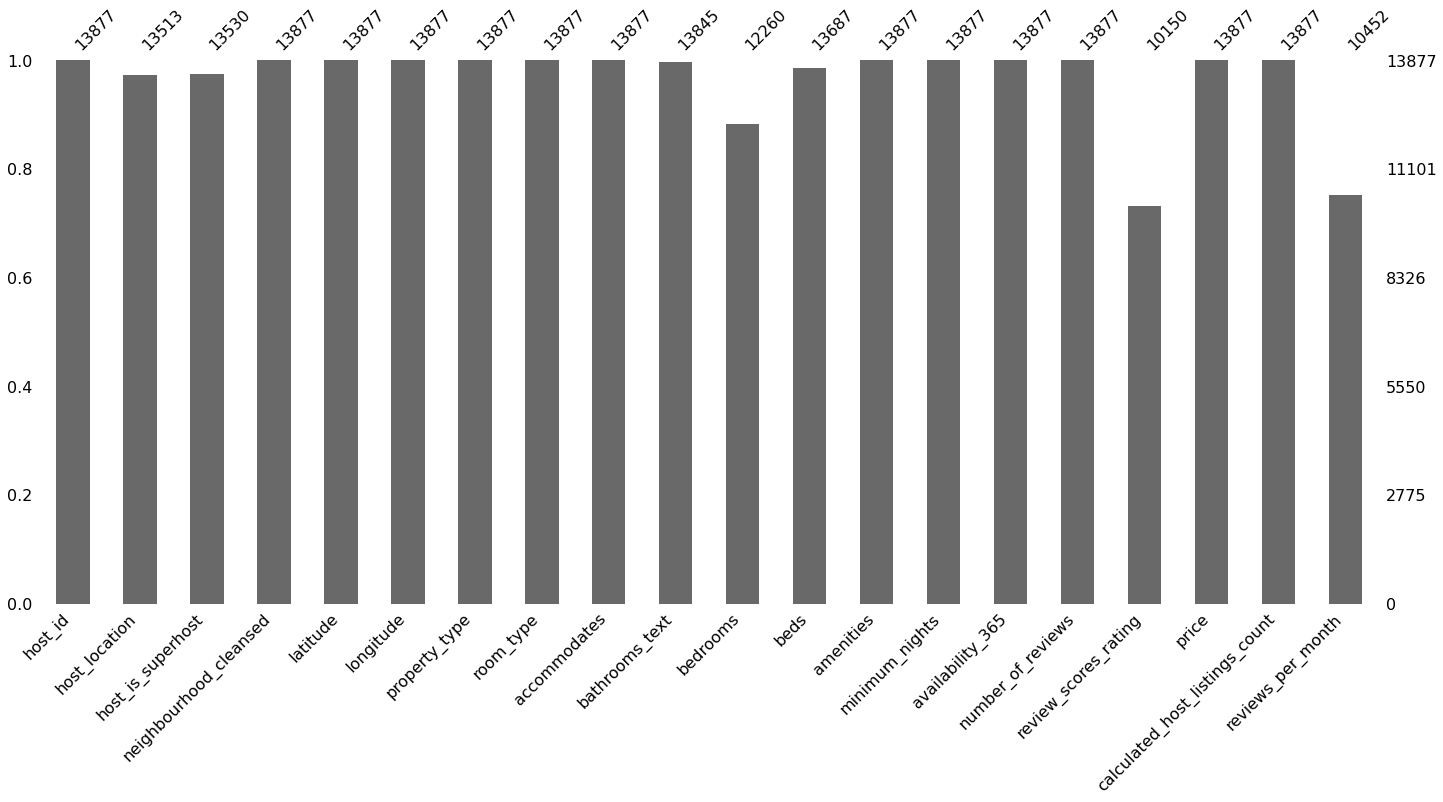

In [17]:
# On peut voir deja qu'il nous manque plusieurs données
# On va decider eventuellement comment proceder avec les valeurs manquantes.
msno.bar(airbnb_montreal)

In [18]:
# Voir le % de données manquantes.
percent_missing = airbnb_montreal.isnull().sum() * 100 / len(airbnb_montreal)
percent_missing

host_id                            0.000000
host_location                      2.623045
host_is_superhost                  2.500540
neighbourhood_cleansed             0.000000
latitude                           0.000000
longitude                          0.000000
property_type                      0.000000
room_type                          0.000000
accommodates                       0.000000
bathrooms_text                     0.230597
bedrooms                          11.652374
beds                               1.369172
amenities                          0.000000
minimum_nights                     0.000000
availability_365                   0.000000
number_of_reviews                  0.000000
review_scores_rating              26.857390
price                              0.000000
calculated_host_listings_count     0.000000
reviews_per_month                 24.681127
dtype: float64

In [19]:
# remplacer les valeur nan de reviews_per_month  par des 0
# remplacer les valeur nan de review_scores_rating   par des 0
airbnb_montreal.fillna({'reviews_per_month':0}, inplace=True)
airbnb_montreal.fillna({'review_scores_rating':0}, inplace=True)
# suppression  des lignes Nan
airbnb_montreal.dropna(inplace=True)
#verification des changements
percent_missing = airbnb_montreal.isnull().sum() * 100 / len(airbnb_montreal)
percent_missing

host_id                           0.0
host_location                     0.0
host_is_superhost                 0.0
neighbourhood_cleansed            0.0
latitude                          0.0
longitude                         0.0
property_type                     0.0
room_type                         0.0
accommodates                      0.0
bathrooms_text                    0.0
bedrooms                          0.0
beds                              0.0
amenities                         0.0
minimum_nights                    0.0
availability_365                  0.0
number_of_reviews                 0.0
review_scores_rating              0.0
price                             0.0
calculated_host_listings_count    0.0
reviews_per_month                 0.0
dtype: float64

# Exploration et visualisations des donnees

In [20]:
# On fait une copie. Toute modification des données de la copie ne sera pas reflétée 
# dans la copie originale (et vice versa).
airbnb = airbnb_montreal.copy(deep=True)

In [21]:
airbnb

,host_id,host_location,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,minimum_nights,availability_365,number_of_reviews,review_scores_rating,price,calculated_host_listings_count,reviews_per_month
0,2277,"Montreal, Québec, Canada",f,Le Plateau-Mont-Royal,45.52859,-73.58480,Private room in house,Private room,2,1 shared bath,1.0,1.0,"[""Host greets you"", ""Free street parking"", ""Dr...",2,110,245,93.0,38.0,1,2.09
1,125031,"Montreal, Quebec, Canada",f,Ville-Marie,45.51939,-73.56482,Entire apartment,Entire home/apt,4,1 bath,1.0,2.0,"[""Iron"", ""Backyard"", ""Microwave"", ""Hangers"", ""...",2,252,330,94.0,96.0,2,2.50
2,125031,"Montreal, Quebec, Canada",f,Ville-Marie,45.51929,-73.56493,Entire house,Entire home/apt,5,1 bath,2.0,2.0,"[""Freezer"", ""Cable TV"", ""Rice maker"", ""Extra p...",3,358,69,92.0,190.0,2,0.62
3,2319,"Montreal, Québec, Canada",t,Le Sud-Ouest,45.48467,-73.57995,Private room in apartment,Private room,1,1 shared bath,1.0,1.0,"[""Freezer"", ""Rice maker"", ""Bathtub"", ""Extra pi...",5,303,154,90.0,40.0,2,1.17
4,149769,"Montreal, Québec, Canada",f,Rosemont-La Petite-Patrie,45.53818,-73.60360,Entire apartment,Entire home/apt,5,1 bath,2.0,3.0,"[""Host greets you"", ""Cable TV"", ""Hot water"", ""...",4,358,4,93.0,135.0,1,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13864,28047654,"Montreal, Quebec, Canada",f,Ville-Marie,45.50480,-73.55489,Entire apartment,Entire home/apt,2,1 bath,1.0,1.0,"[""Dining table"", ""Hot water"", ""Kitchen"", ""Iron...",30,215,0,0.0,109.0,46,0.00
13865,364861371,CA,f,Ville-Marie,45.49619,-73.57615,Entire apartment,Entire home/apt,4,1 bath,1.0,2.0,"[""Freezer"", ""Bathtub"", ""Dining table"", ""Extra ...",1,32,0,0.0,30.0,40,0.00
13866,364861371,CA,f,Ville-Marie,45.49660,-73.57713,Entire apartment,Entire home/apt,4,1 bath,1.0,2.0,"[""Freezer"", ""Bathtub"", ""Dining table"", ""Extra ...",1,32,0,0.0,30.0,40,0.00
13867,364861371,CA,f,Ville-Marie,45.49838,-73.57601,Entire apartment,Entire home/apt,4,1 bath,1.0,2.0,"[""Freezer"", ""Bathtub"", ""Dining table"", ""Extra ...",1,31,0,0.0,30.0,40,0.00


In [22]:
airbnb.columns

Index(['host_id', 'host_location', 'host_is_superhost',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'minimum_nights', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'price', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

# Question 1: Choisir le prix de location Airbnb

Question 1: Choisir le prix de location Airbnb
On desire choisir un bon prix pour louer notre logement. Pour cela, on va consulter les annonces semblables a Montréal pour se faire une idée des prix du marché. Les hôtes Airbnb proposent une grande variété de logements, allant de la chambre partagée à l'île privée. On s'interesse seulement a certaines types de logements. Plus specifiquement, on desire avoir dans notre base de données uniquement les condominiums et les autres logements qui sont proches de condominiums. Également, on exclu de la base de données les chambres privées, les chambres d'hôtel, et les chambres partagées car ce types de logements ne sont pas representatifs.

In [23]:
# On choisi le type de logement a garder dans le DataFrame
array = ['Earth house', 'Entire apartement', 'Entire bungalow',
         'Entire cabin', 'Entire chalet', 'Entire condominium',
         'Entire house', 'Entire loft']
airbnb=airbnb.loc[airbnb['property_type'].isin(array)]

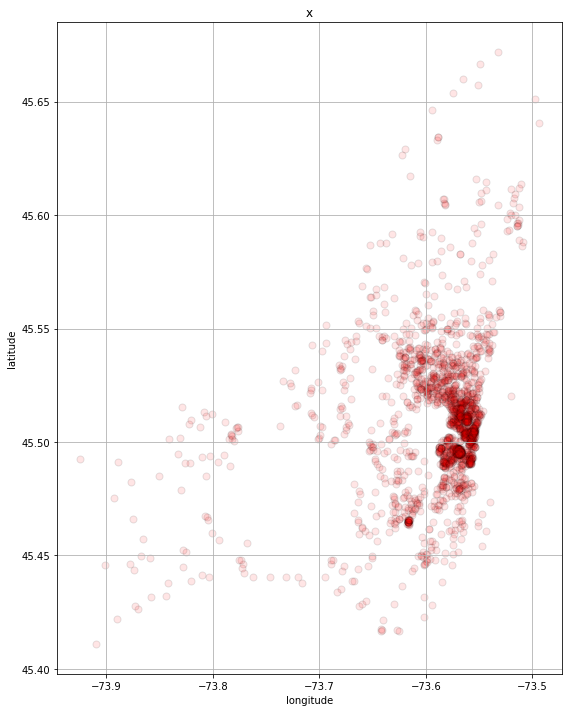

In [24]:
plt.figure(num=None, figsize=(8, 10))
plt.scatter("longitude", "latitude", data = airbnb, c = 'r',alpha = 0.1, edgecolor = 'black', s=50)
plt.grid()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('x')
plt.tight_layout()
plt.axis('tight')

plt.show()

In [25]:
# importation fichier lieu
lieu_int=pd.read_csv("lieux_interet.csv")

In [26]:
def add_categorical_legend(folium_map, title, colors, labels):
    if len(colors) != len(labels):
        raise ValueError("colors and labels must have the same length.")

    color_by_label = dict(zip(labels, colors))
    
    legend_categories = ""     
    for label, color in color_by_label.items():
        legend_categories += f"<li><span style='background:{color}'></span>{label}</li>"
        
    legend_html = f"""
    <div id='maplegend' class='maplegend'>
      <div class='legend-title'>{title}</div>
      <div class='legend-scale'>
        <ul class='legend-labels'>
        {legend_categories}
        </ul>
      </div>
    </div>
    """
    script = f"""
        <script type="text/javascript">
        var oneTimeExecution = (function() {{
                    var executed = false;
                    return function() {{
                        if (!executed) {{
                             var checkExist = setInterval(function() {{
                                       if ((document.getElementsByClassName('leaflet-top leaflet-right').length) || (!executed)) {{
                                          document.getElementsByClassName('leaflet-top leaflet-right')[0].style.display = "flex"
                                          document.getElementsByClassName('leaflet-top leaflet-right')[0].style.flexDirection = "column"
                                          document.getElementsByClassName('leaflet-top leaflet-right')[0].innerHTML += `{legend_html}`;
                                          clearInterval(checkExist);
                                          executed = true;
                                       }}
                                    }}, 100);
                        }}
                    }};
                }})();
        oneTimeExecution()
        </script>
      """
   

    css = """

    <style type='text/css'>
      .maplegend {
        z-index:9999;
        float:right;
        background-color: rgba(255, 255, 255, 1);
        border-radius: 5px;
        border: 2px solid #bbb;
        padding: 10px;
        font-size:12px;
        positon: relative;
      }
      .maplegend .legend-title {
        text-align: left;
        margin-bottom: 5px;
        font-weight: bold;
        font-size: 90%;
        }
      .maplegend .legend-scale ul {
        margin: 0;
        margin-bottom: 5px;
        padding: 0;
        float: left;
        list-style: none;
        }
      .maplegend .legend-scale ul li {
        font-size: 80%;
        list-style: none;
        margin-left: 0;
        line-height: 18px;
        margin-bottom: 2px;
        }
      .maplegend ul.legend-labels li span {
        display: block;
        float: left;
        height: 16px;
        width: 30px;
        margin-right: 5px;
        margin-left: 0;
        border: 0px solid #ccc;
        }
      .maplegend .legend-source {
        font-size: 80%;
        color: #777;
        clear: both;
        }
      .maplegend a {
        color: #777;
        }
    </style>
    """

    folium_map.get_root().header.add_child(folium.Element(script + css))

    return folium_map

In [27]:
array = ['Attrait touristique']
touristas=lieu_int.loc[lieu_int['Catégorie'].isin(array)]

array = ['Parc et autre espace vert']
parcs=lieu_int.loc[lieu_int['Catégorie'].isin(array)]

array = ['Regroupement de commerces']
commerces=lieu_int.loc[lieu_int['Catégorie'].isin(array)]

In [28]:
import folium.plugins as plugins
from folium.plugins import MarkerCluster
from folium.features import CustomIcon

m = folium.Map(location=[45.5016889, -73.567256],  # Les coordonées
              zoom_start=10,                       # Le zoom de debut
              tiles='Stamen Terrain'               # le style de carte
              )

cluster = MarkerCluster().add_to(m)

for x in airbnb.iterrows():
    folium.Marker([x[1].latitude, x[1].longitude]).add_to(cluster)
    

for i in range(0,len(touristas)):
    folium.Circle(
      location=[touristas.iloc[i]['Latitude'], touristas.iloc[i]['Longitude']],
      popup=touristas.iloc[i]['Nom français'],
      radius=8,
      color='blue',
      fill=True,
      fill_color='blue'
).add_to(m)
    
for i in range(0,len(parcs)):
    folium.Circle(
      location=[parcs.iloc[i]['Latitude'], parcs.iloc[i]['Longitude']],
      popup=parcs.iloc[i]['Nom français'],
      radius=8,
      color='green',
      fill=True,
      fill_color='green'
).add_to(m)
    
for i in range(0,len(commerces)):
    folium.Circle(
      location=[commerces.iloc[i]['Latitude'], commerces.iloc[i]['Longitude']],
      popup=commerces.iloc[i]['Nom français'],
      radius=8,
      color='red',
      fill=True,
      fill_color='red'
).add_to(m)
    
m = add_categorical_legend(m, 'Tourisme Montréal',
                           colors = ['Green','Blue','Red'],
                           labels = ['Parc et autre espace vert', 'Attrait touristique','Regroupement de commerces'])


    
m

# Étude de prix airbnb

Finalement, comment fixer le prix airbnb pour le logement? Avant tout, on doit inspecter notre colonne des prix pour s'assurer que les données sont nettoyés. Commencons par certaines calculs statistiques:
* la moyenne
* la mediane
* les quartiles Q1 et Q3
* la variance
* l’écart-type
* L’écart interquartile

##### La moyenne

In [30]:
# Normalement, on devrait se baser sur la moyenne des prix airbnb car c'est une donnée qui représente 
# le centre d'équilibre d'une distribution.

le_prix = airbnb['price']
moyenne = np.mean(le_prix)

# la fonction round est juste pour arrondir a deux nombre apres virgule
print ("Moyenne de prix est : ", round(moyenne, 2))

Moyenne de prix est :  144.59


Cependant, La moyenne est sensible aux valeurs extrêmes et il est toujours utile de calculer aussi la médiane qui est moins sensible à ces valeurs.

##### La mediane

La médiane est une valeur réelle m telle qu’il y ait au moins autant d’observations x_{i} inférieures ou égales à m que supérieure ou égales à m. 

In [31]:
mediane = np.median(le_prix)
print ("La mediane de prix est : ", round(mediane, 2))

La mediane de prix est :  104.0


On remarque qu'il y a une grande difference entre la moyenne et la mediane. Cela veut dire qu'on a une répartition « inégalitaire » car la distribution des prix est fortement inégalitaire.

Si la médiane est inférieure à la moyenne, les inégalités se situent en haut de l’échelle. Dans le cas inverse, les inégalités se situent en bas de l’échelle. Dans notre cas, la mediane est de 37.25$ plus petite que la moyenne et on peut confirmer que les inégalités se situent en haut de l’échelle.

##### Les quartiles Q1 et Q3

Le premier quartile est la plus petite valeur Q{1} de la série de données tel que 25% au moins des valeurs lui sont inférieures ou égales.

In [32]:
# On calcule le quantile 0,25 qui est le quartile Q1
Q1 = round(np.percentile(le_prix, 25))
print("Quartile Q1 vaut : ", Q1)

Quartile Q1 vaut :  78


Le troisième quartile est la plus petite valeur Q{3} de la série de données tel que 75% des autres valeurs lui sont inférieures ou égales.

In [33]:
# On calcule le quantile 0,75 qui est le quartile Q3
Q3 = round(np.percentile(le_prix, 75))
print("Quartile Q3 vaut : ", round(np.percentile(le_prix, 75)))

Quartile Q3 vaut :  164


##### La variance

La variance indique de quelle manière la série de données se disperse autour de la moyenne. Une variance élevée indique que les valeurs sont très écartées les unes des autres et vice versa.

In [34]:
variance = np.var(le_prix)
print ("La variance de prix est : ", round(variance, 2))

La variance de prix est :  15004.53


##### L’écart-type

L’écart type est aussi une mesure de dispersion des données. Il est tout simplement la racine carrée de la variance. On utilise  l’écart pour mieux appréhender le degré de dispersion des données.

In [35]:
ecartType = np.std(le_prix)
print ("L'ecart-type de prix est : ", round(ecartType, 2))

L'ecart-type de prix est :  122.49


##### L’écart interquartile

L’écart intequartile mesure la dispersion de 50% des données du dataset. Les 50% des données correspond à celles comprises entre le premier quartile Q1 et le 3eme quartile Q3.

L’écart interquartile est tout simplement la soustraction du troisième quartile du premier

In [36]:
# On calcule le quantile 0,25 qui est le quartile Q1
Q1 = round(np.percentile(le_prix, 25))
 
# On calcule le quantile 0,75 qui est le quartile Q3
Q3 = round(np.percentile(le_prix, 75))

# L ecart interquartile est Q3 - Q1
print("L'ecart interquartile vaut : ", Q3 - Q1)

L'ecart interquartile vaut :  86


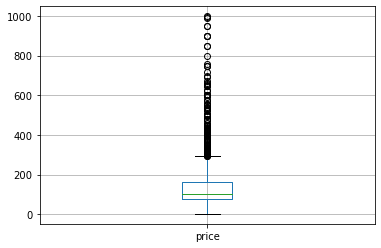

In [37]:
# Comme on peut le remarquer ici, on a plusieurs données aberrantes qui peuvent corrompre notre prix pour airbnb
boxplot = airbnb.boxplot(column=['price'])

In [38]:
# On voit que le prix maximum dans la colonne price est de 999$.
maximum = airbnb["price"]
val_max = maximum.max()
print(val_max)

999.0


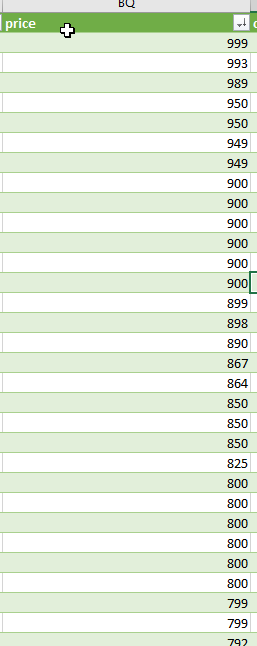

##### Suppression des valeurs aberrantes

Pour travailler avec nos valeurs aberrantes, on va creer certaines fonctions d'assistance

In [39]:
"""Cette fonction nous aide a faire 6 calculs statistiques"""
"""la mediane, q1, q3, interquartile, minimum, maximum"""
def avoir_ecart_interquartile(df_entree, col_nom):
    median = df_entree[col_nom].median() # La mediane
    q1 = df_entree[col_nom].quantile(0.25) # 25% / 1ere quartile
    q3 = df_entree[col_nom].quantile(0.75) # 75% / 3eme quartile
    iqr = q3-q1 # Interquatille
    minimum  = q1-1.5*iqr # La valeur minimale
    maximum = q3+1.5*iqr # La valeur maximale
    return median, q1, q3, iqr, minimum, maximum

"""Cette fonction enrichi la fonction ecart_interquartile avec des noms"""
def avoir_ecart_interquartile_text(df_entree, col_nom):
    median, q1, q3, iqr, minimum, maximum = avoir_ecart_interquartile(df_entree, col_nom)
    text = f"Mediane={median:.2f},\
    Q1 = {q1:.2f},\
    Q3={q3:.2f},\
    IQR={iqr:.2f},\
    Minimum={minimum:.2f},\
    Maximum={maximum:.2f}"
    return text 

"""Cette fonction efface les données aberantes"""
"""minimum < Données < maximum """
def eff_val_aber(df_entree, col_nom):
    _, _, _, _,minimum, maximum = avoir_ecart_interquartile(df_entree, col_nom)
    df_sortie=df_entree.loc[(df_entree[col_nom] > minimum) & (df_entree[col_nom] < maximum)]
    return df_sortie

"""Cette fonction compte les données aberantes"""
"""minimum < Données < maximum """
def compteur_val_aber(df_entree, col_nom):
    _, _, _, _,minimum, maximum = avoir_ecart_interquartile(df_entree, col_nom)
    df_aber = df_entree.loc[(df_entree[col_nom] <= minimum) | (df_entree[col_nom] >= maximum)]
    return df_aber.shape[0]

"""Cette fonction visualise les données aberantes"""
def valeurs_aber(df_entree, col_nom):
    titre = avoir_ecart_interquartile_text(df_entree, col_nom)
    sns.boxplot(df_entree[col_nom])
    plt.title(titre)
    plt.show()

sns.boxplot permet de visualiser nos prix pour airbnb; les valeurs aberrantes sont les points qui se trouvent en dehors de moustaches | - et - | 

C:\Users\Ilyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


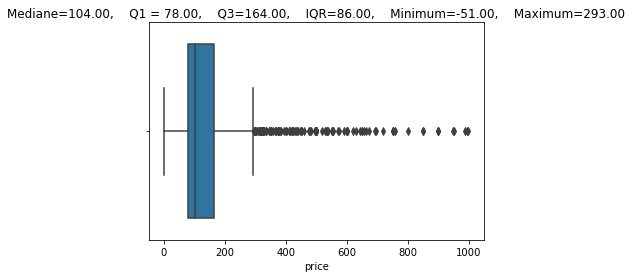

In [40]:
# Voir le graphique
valeurs_aber(airbnb, 'price')

In [41]:
_, _, _, _, minimum_Col_avant, maximum_Col_avant = avoir_ecart_interquartile(airbnb, 'price')

In [42]:
print(f"Notre colonne price a {compteur_val_aber(airbnb, 'price')} valeurs aberrantes")

Notre colonne price a 164 valeurs aberrantes


# Suppression des valeurs aberrantes et visualisation du résultat

Nous pouvons maintenant supprimer les lignes des données qui contiennent des valeurs aberrantes en dehors de 
moustaches.

In [43]:
print(f"Lignes avant la suppression de données aberrantes: {airbnb.shape[0]}")

Lignes avant la suppression de données aberrantes: 1944


In [44]:
airbnb = eff_val_aber(airbnb, 'price')

C:\Users\Ilyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


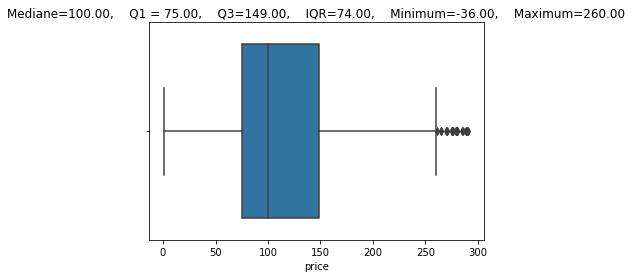

In [45]:
valeurs_aber(airbnb, 'price')
_, _, _, _, minimum_Col_apres, maximum_Col_apres = avoir_ecart_interquartile(airbnb, 'price')

In [46]:
# Nos données semblent toujours avoir des valeurs aberrantes
print(f"Notre colonne price a {compteur_val_aber(airbnb, 'price')} valeurs aberrantes")

Notre colonne price a 32 valeurs aberrantes


La raison pour laquelle la colonne "price" semblent toujours avoir des valeurs aberrantes est que nous avons supprimé les valeurs aberrantes en fonction du minimum et du maximum du DataFrame d'origine

In [47]:
print(f"Limites (origine) : minium={minimum_Col_avant:.2f}, maximum={maximum_Col_avant:.2f}")

Limites (origine) : minium=-51.00, maximum=293.00


In [48]:
print(f"Nouvelle valeur pour : minium={airbnb['price'].min():.2f}, maximum={airbnb['price'].max():.2f}")

Nouvelle valeur pour : minium=1.00, maximum=291.00


In [49]:
print(f"Nouvelles limites: minium={minimum_Col_apres:.2f}, maximum={maximum_Col_apres:.2f}")

Nouvelles limites: minium=-36.00, maximum=260.00


In [50]:
print(f"La colonne a {compteur_val_aber(airbnb, 'price')} valeurs aberrantes")

La colonne a 32 valeurs aberrantes


Nous pouvons soit accepter ce résultat d'apparence légèrement étrange, soit continuer à couper les valeurs aberrantes jusqu'à ce qu'il n'y en ait plus dans le bloc de données mis à jour. Créer une nouvelle fonction d'aide

In [51]:
# Cette fonction d'assistance appellera eff_val_aber à plusieurs reprises jusqu'à ce que toutes 
# les valeurs aberrantes aient été supprimées, y compris celles qui se trouvaient à l'intérieur 
# des anciennes limites mais juste à l'extérieur des nouvelles .

def enl_tout_val_aber(df_entree, col_nom):
    compteur = 0
    compt_val_aber = compteur_val_aber(df_entree, col_nom)

    while compt_val_aber > 0:
        compteur += 1

        if (compteur > 100):
            break

        df_entree = eff_val_aber(df_entree, col_nom)
        compt_val_aber = compteur_val_aber(df_entree, col_nom)
    
    return df_entree

In [52]:
airbnb= enl_tout_val_aber(airbnb, 'price')

C:\Users\Ilyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


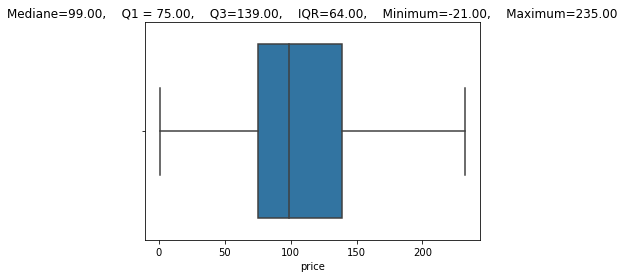

In [53]:
valeurs_aber(airbnb, 'price')
_, _, _, _, minimum_Col_apres, maximum_Col_apres = avoir_ecart_interquartile(airbnb, 'price')

In [54]:
print(f"La colonne a {compteur_val_aber(airbnb, 'price')} valeurs aberrantes")

La colonne a 0 valeurs aberrantes


# Fixer le prix airbnb

Finalement, comment fixer le prix airbnb pour le logement? Pour repondre a cette question, on utilisera la méthode des K plus proches voisins (KNN). Plus precisement, notre strategie est de trouver quelques logements similaires, calculer le prix moyen par nuit de ces logements et definir ce prix pour notre logement. 

Pour cela, on va choisir un nombre k de logements similaires a notre logement cible et pour chaque logement, on va calculer la similarité. Pour notre cas, on utilisera k=10 (on va se comparer avec les 10 plus proches voisins). On utilisera la distance Euclidienne pour calculer la distance entre notre logement qui peut acculeillir 3 personnes et logements voisins qui peuvent accueillir egalement 3 personnes. 

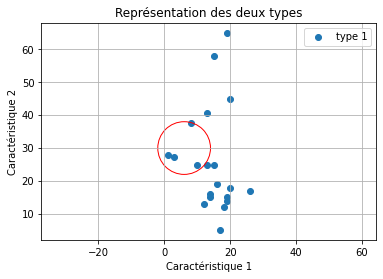

In [55]:
from math import *
import matplotlib.pyplot as plt

# Données de type 1
liste_x_1=[1,3,8,13,10,15,19,20,13,14,15,19,12,18,16,17,19,20,14,26]
liste_y_1=[28,27.2,37.6,40.7,25,58,65,45,25,15,25,14,13,12,19,5,15,18,16,17]


fig, ax = plt.subplots()


plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.title('Représentation des deux types')
plt.axis('equal') # pour avoir un repère orthonormé. Faire des tests.
plt.grid()
plt.scatter(liste_x_1,liste_y_1, label='type 1')

plt.legend()

# Ajout d'un cercle (ou d'une ellipse)
ax.add_artist(plt.Circle((6, 30), 8, edgecolor='r', facecolor='none'))



plt.show()

C:\Users\Ilyas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 74.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ilyas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Ilyas\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


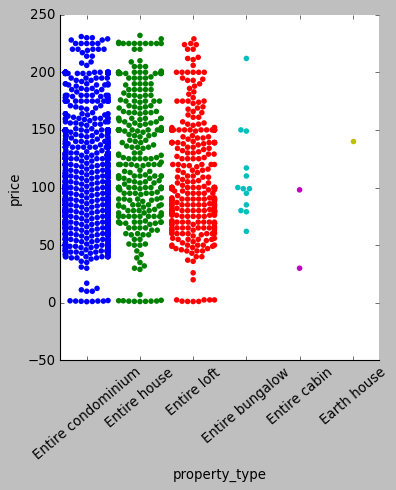

In [77]:
sns.catplot(x="property_type", y="price", kind="swarm", data=airbnb)
plt.xticks(rotation=40)
plt.show()

Calculer la distance entre chaque valeur de la colonne 'accommodates' de paris_listings et la valeur 3 (qui est le nombre de personnes que peut accueillir notre logement): Utiliser la méthode apply pour calculer la valeur absolue entre chaque valeur de 'accommodates' et 3 et retourner un nouvel objet Series contenant les valeurs de distance. Assigner les valeurs de distance à la colonne 'distance' du dataframe. Utiliser la méthode Series value_counts() et afficher le décompte de chaque valeur unique de la colonne 'distance'.

In [57]:
# df['accommodates'].apply(lambda x: x + 2) retourne un nouvel objet Series où chaque valeur
# d'origine de la colonne 'accommoaçpl=0tes' vaut 2 de plus
nb_accomodates = 3
airbnb['distance'] = airbnb['accommodates'].apply(lambda x: np.abs(x - nb_accomodates))
print(airbnb['distance'].value_counts())

1     1034
3      214
0      190
2      127
5       48
4       32
7       15
13      11
9        7
6        5
10       5
11       4
12       3
Name: distance, dtype: int64


In [58]:
airbnb[airbnb["distance"]== 0]["accommodates"]

65       3
272      3
388      3
394      3
462      3
        ..
13570    3
13572    3
13580    3
13619    3
13716    3
Name: accommodates, Length: 190, dtype: int64

In [59]:
np.random.seed(0)
airbnb.reset_index(drop=True, inplace=True)
airbnb = airbnb.loc[np.random.permutation(len(airbnb))]
airbnb = airbnb.sort_values('distance')
airbnb.iloc[0:10]['price']

65      91.0
767     65.0
195     79.0
136     89.0
936    200.0
129     94.0
318    120.0
596     80.0
144     80.0
902     75.0
Name: price, dtype: float64

In [60]:
nb_accomodates = 3
def predict_price(nb_accomodates):
    temp_df = airbnb.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - nb_accomodates))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors = temp_df.iloc[0:50]['price']
    predicted_price = nearest_neighbors.mean()
    return(predicted_price)

In [61]:
acc_one = predict_price(3)

In [62]:
print(acc_one)

101.84454


In [63]:
le_prix = airbnb['price']
moyenne = np.mean(le_prix)

# la fonction round est juste pour arrondir a deux nombre apres virgule
print ("Moyenne de prix est : ", round(moyenne, 2))

Moyenne de prix est :  107.55


In [64]:
mediane = np.median(le_prix)
print ("La mediane de prix est : ", round(mediane, 2))

La mediane de prix est :  99.0


# Tester le resultat

Pouvons nous faire confiance au prix qu'on a recu? On doit faire un test pour s'assurer que notre modele fonctionne bien.
Pour cela, on va separer notre dataframe en 2 parties. 

In [65]:
# On a 2379 valeurs dans la colonne "price"
print(airbnb["price"].value_counts().sum())

1695


In [66]:
# On va separer les données
     # train_df contenant 1500 lignes de paris_listings
     # test_df contenant le reste
        
train_df = airbnb.iloc[0:1784]
test_df = airbnb.iloc[1784:]


In [67]:
nb_accomodates = 3
def predict_price(nb_accomodates):
    temp_df = train_df.copy()
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - nb_accomodates))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors = temp_df.iloc[0:50]['price']
    predicted_price = nearest_neighbors.mean()
    return(predicted_price)

In [69]:
predict_price(3)

101.84454

# Étudions le details des chambres (Room Type)

In [70]:
airbnb_montreal.columns

Index(['host_id', 'host_location', 'host_is_superhost',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'minimum_nights', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'price', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [71]:
airbnb_montreal.head(10)

,host_id,host_location,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,minimum_nights,availability_365,number_of_reviews,review_scores_rating,price,calculated_host_listings_count,reviews_per_month
0,2277,"Montreal, Québec, Canada",f,Le Plateau-Mont-Royal,45.52859,-73.58480,Private room in house,Private room,2,1 shared bath,1.0,1.0,"[""Host greets you"", ""Free street parking"", ""Dr...",2,110,245,93.0,38.0,1,2.09
1,125031,"Montreal, Quebec, Canada",f,Ville-Marie,45.51939,-73.56482,Entire apartment,Entire home/apt,4,1 bath,1.0,2.0,"[""Iron"", ""Backyard"", ""Microwave"", ""Hangers"", ""...",2,252,330,94.0,96.0,2,2.50
2,125031,"Montreal, Quebec, Canada",f,Ville-Marie,45.51929,-73.56493,Entire house,Entire home/apt,5,1 bath,2.0,2.0,"[""Freezer"", ""Cable TV"", ""Rice maker"", ""Extra p...",3,358,69,92.0,190.0,2,0.62
3,2319,"Montreal, Québec, Canada",t,Le Sud-Ouest,45.48467,-73.57995,Private room in apartment,Private room,1,1 shared bath,1.0,1.0,"[""Freezer"", ""Rice maker"", ""Bathtub"", ""Extra pi...",5,303,154,90.0,40.0,2,1.17
4,149769,"Montreal, Québec, Canada",f,Rosemont-La Petite-Patrie,45.53818,-73.60360,Entire apartment,Entire home/apt,5,1 bath,2.0,3.0,"[""Host greets you"", ""Cable TV"", ""Hot water"", ""...",4,358,4,93.0,135.0,1,0.03
5,381468,"Montreal, Quebec, Canada",t,Le Plateau-Mont-Royal,45.53026,-73.58413,Entire apartment,Entire home/apt,2,1 bath,1.0,2.0,"[""Cable TV"", ""Indoor fireplace"", ""Extra pillow...",3,246,40,98.0,130.0,6,0.56
6,163569,"Montreal, Quebec, Canada",f,Ville-Marie,45.52699,-73.55840,Private room in apartment,Private room,1,1 shared bath,3.0,4.0,"[""Host greets you"", ""Cable TV"", ""Hot water"", ""...",10,365,14,88.0,50.0,2,0.12
8,208453,"Montreal, Quebec, Canada",f,Côte-des-Neiges-Notre-Dame-de-Grâce,45.47012,-73.60725,Entire apartment,Entire home/apt,4,1 bath,4.0,4.0,"[""Bathtub"", ""Hot water"", ""Kitchen"", ""Iron"", ""L...",180,365,20,89.0,80.0,2,0.17
9,231694,"Montreal, Quebec, Canada",t,Rosemont-La Petite-Patrie,45.54157,-73.60737,Entire apartment,Entire home/apt,4,1 bath,1.0,2.0,"[""Host greets you"", ""Bathtub"", ""Extra pillows ...",3,27,141,98.0,70.0,1,1.10
10,123488,"Montreal, Québec, Canada",f,Le Plateau-Mont-Royal,45.52867,-73.57457,Entire apartment,Entire home/apt,2,1 bath,2.0,2.0,"[""Cooking basics"", ""Dryer"", ""Kitchen"", ""Dishes...",7,38,46,98.0,100.0,1,0.37


C:\Users\Ilyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


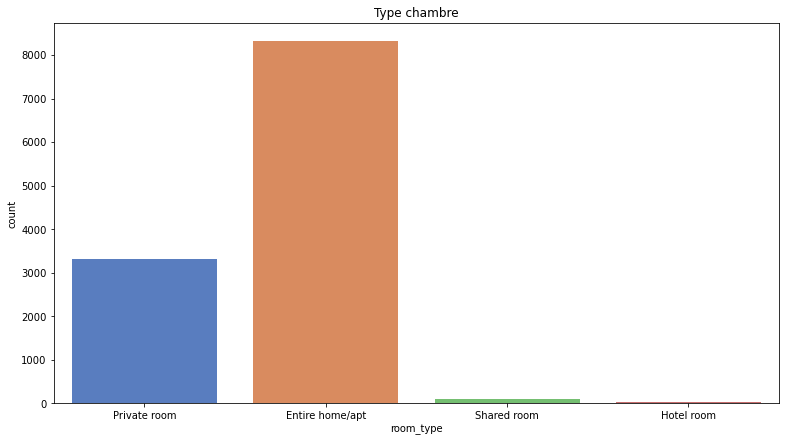

In [72]:
plt.figure(figsize=(13,7))
plt.title("Type chambre")
sns.countplot(airbnb_montreal.room_type, palette="muted")
fig = plt.gcf()
plt.show()

On costate que les chambre prive (Private room) et les maison/appartement complete (Entire home/apt) ils sont les plus loue

On vas regarder le type des chambre occuper par rapport a l'emplacement

C:\Users\Ilyas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


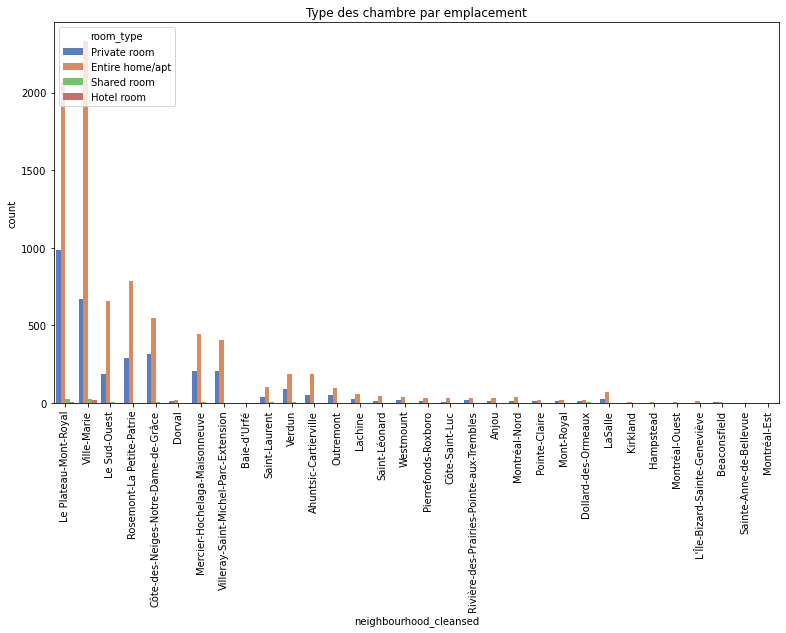

In [73]:
plt.figure(figsize=(13,7))
plt.title("Type des chambre par emplacement")
sns.countplot(airbnb_montreal.neighbourhood_cleansed,hue=airbnb_montreal.room_type, palette="muted")
plt.xticks(rotation = '90')
plt.show()

le graphique nous montre que la majorite de chambre prive sont proche de ( Plateau-Mont-Royal) et les maison/appartement la majorite est entre ( Plateau-Mont-Royal)  et Ville-Marie

* On analyse l'emplacement avec la disponibilite 

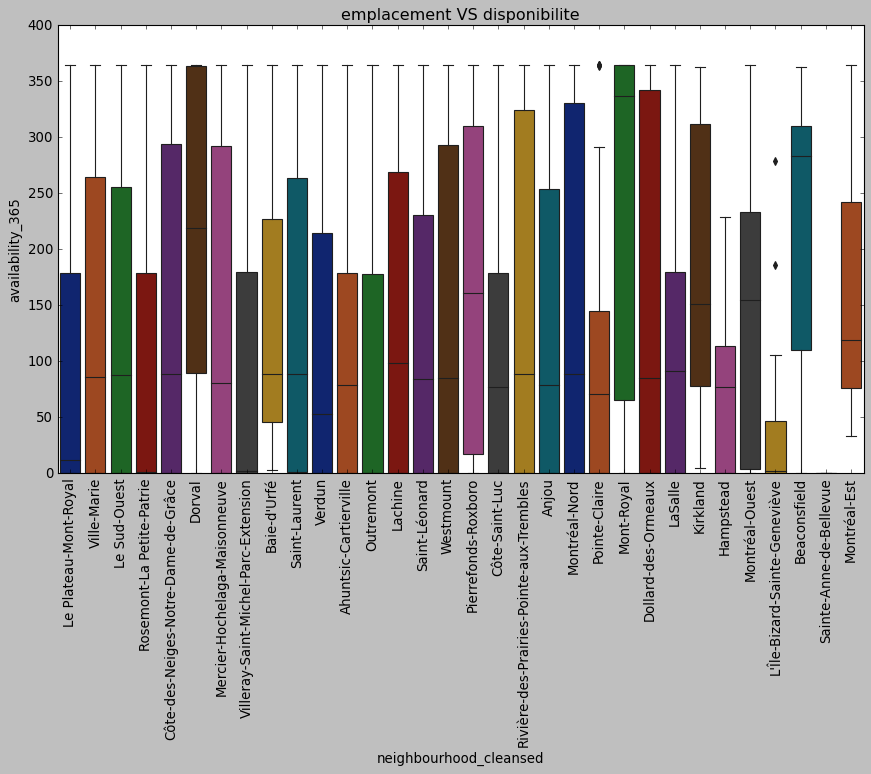

In [74]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("emplacement VS disponibilite")
sns.boxplot(data=airbnb_montreal, x='neighbourhood_cleansed',y='availability_365',palette="dark")
plt.xticks(rotation = '90')
plt.show()

le graphe explique bien la disponibilite par rapport a l'emplacement


# Prediction de Prix

on verifie la correlation entre les colonnes


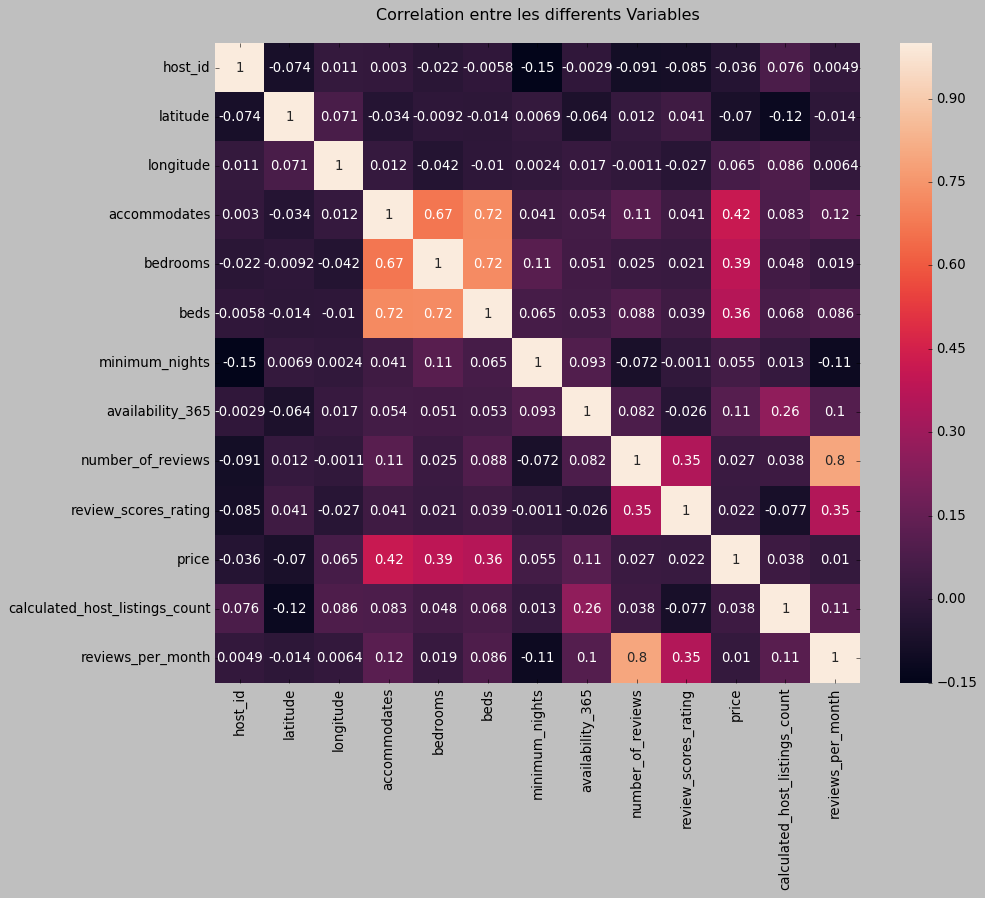

In [75]:
corr = airbnb_montreal.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation entre les differents Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

le graphe ci-dessus ne montre pas une forte correlation entre les colonne a part "review_per_month" et  "number_of_review".

# Conclusion:
## selon les resultats on peut constater que l'emplacement  qui determine les prix les plus cher ainsi la disponibilite toute l'annee que ce dernier est bien explique par le type de chambre